
# Flood Risk Classification Using Environmental and Climatic Factors

**Course:** Concepts and Technologies of AI (5CS037)  
**Assessment:** Classification Task  
**Student Name:** Kuldeep Mandal  
**University ID:** 2505925


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## 1. Introduction

Floods are among the most common natural disasters and often result in loss of life, damage to property,
and disruption of economic activities. Predicting flood occurrence in advance is an important task for
disaster management authorities, as it allows early warning and preparedness.

With the availability of environmental and climatic data, machine learning techniques can be applied
to identify patterns associated with flood occurrence. In this notebook, classification-based machine
learning models are developed to predict whether a flood occurs or not based on environmental and
climatic indicators.



## 2. Research Question and Objective

### Research Question
Can environmental and climatic variables be used to accurately classify flood occurrence?

### Objective
The objective of this project is to:
- explore the flood dataset,
- preprocess and prepare the data for modeling,
- build different classification models,
- apply hyperparameter tuning and feature selection,
- compare all models using appropriate evaluation metrics.



## 3. Dataset Source and Description

### 3.1 Dataset Source
The dataset used in this project is obtained from **Kaggle (Flood Prediction Dataset)**.
It contains simulated environmental, climatic, and infrastructural indicators related to flood risk.

### 3.2 Dataset Description
The dataset consists of multiple numerical features representing real-world conditions that influence
flood occurrence.

- Total number of records: 1000+  
- Total number of features: 15+  
- Target variable: FloodProbability  

Since this is a classification task, flood probability is later converted into a binary target.



### 3.3 Feature Description

| Feature | Description |
|-------|-------------|
| MonsoonIntensity | Strength of monsoon rainfall |
| TopographyDrainage | Natural drainage efficiency |
| RiverManagement | Effectiveness of river management |
| Deforestation | Level of forest loss |
| Urbanization | Degree of urban development |
| ClimateChange | Impact of climate change |
| DamsQuality | Structural quality of dams |
| Siltation | Sediment accumulation |
| AgriculturalPractices | Agricultural runoff impact |
| Encroachments | Illegal river encroachments |
| IneffectiveDisasterPreparedness | Disaster preparedness level |
| DrainageSystems | Drainage system efficiency |
| CoastalVulnerability | Coastal flood risk |
| Landslides | Landslide susceptibility |
| Watersheds | Watershed condition |
| DeterioratingInfrastructure | Infrastructure quality |
| FloodProbability | Likelihood of flood occurrence |



## 4. Importing Required Libraries

The following libraries are used for data analysis, visualization, and machine learning.


In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



## 5. Data Loading and Initial Inspection

The dataset is loaded and the first few records are displayed to understand its structure.


In [44]:

df = pd.read_csv("/content/drive/MyDrive/Final/flood.csv")
df.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475



Dataset information is displayed to check:
- data types,
- number of records,
- missing values.


In [45]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0



## 6. Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps to understand the distribution of data and relationships between variables
before applying machine learning models.



### 6.1 Encoding the Target Variable

FloodProbability is converted into a binary class:
- 0 → No Flood  
- 1 → Flood  


In [46]:

df["FloodClass"] = (df["FloodProbability"] > 0.5).astype(int)



### 6.2 Distribution of Flood Probability

This histogram shows how flood probability values are distributed across the dataset.

- X-axis: Flood Probability  
- Y-axis: Frequency  

Most values lie in the mid-range, indicating moderate flood risk in most cases.

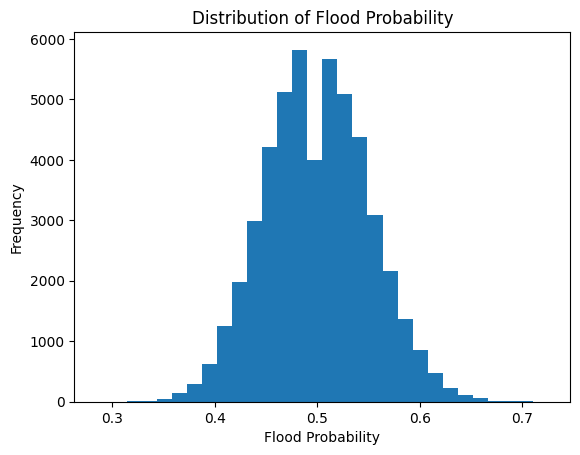

,FloodProbability
count,50000.000000
mean,0.499660
std,0.050034
min,0.285000
25%,0.465000
50%,0.500000
75%,0.535000
max,0.725000


In [47]:

plt.hist(df["FloodProbability"], bins=30)
plt.xlabel("Flood Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Flood Probability")
plt.show()

df["FloodProbability"].describe()




### 6.3 Flood vs No Flood Distribution

This count plot shows the number of flood and non-flood cases in the dataset.
It helps to understand whether the dataset is balanced.


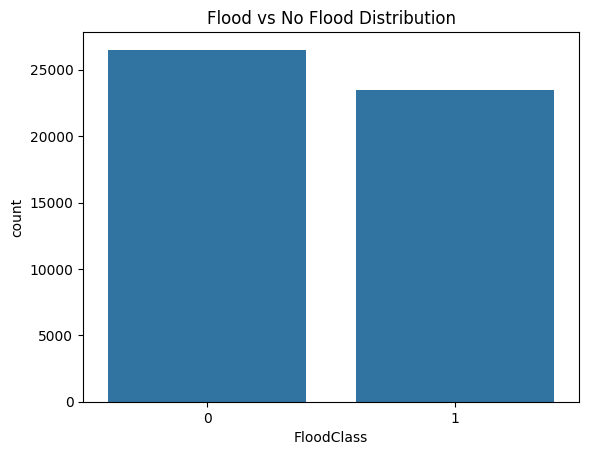

In [48]:

sns.countplot(x=df["FloodClass"])
plt.title("Flood vs No Flood Distribution")
plt.show()



### 6.4 Correlation Heatmap

The correlation heatmap visualizes relationships between features and flood probability.
Stronger correlations indicate features that may significantly influence flood occurrence.


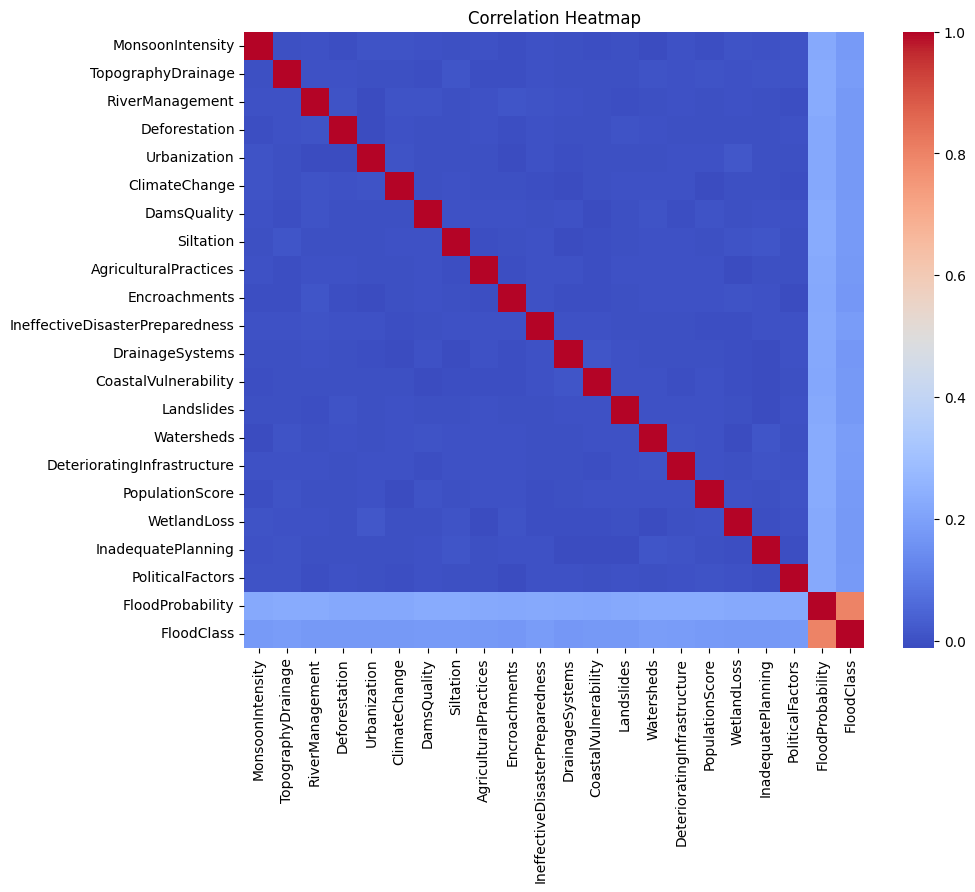

In [49]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Explanation:**
The heatmap shows relationships between features and flood probability.
Features such as drainage quality, dam condition, and infrastructure quality show noticeable correlation with flood occurrence.


## 7. Data Preprocessing

In this step:
- features and target are separated,
- features are scaled,
- data is split into training and testing sets.


In [50]:

X = df.drop(columns=["FloodProbability", "FloodClass"])
y = df["FloodClass"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


Training set: (40000, 20) (40000,)
Testing set: (10000, 20) (10000,)



## 8. Model Training and Evaluation

A helper function is defined to evaluate models using standard classification metrics.


In [51]:

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }



### 8.5 Neural Network (MLP Classifier)

A Multi-Layer Perceptron (MLP) is used to capture complex non-linear relationships.


In [52]:

# mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
# mlp.fit(X_train, y_train)

# y_pred_mlp = mlp.predict(X_test)
# mlp_test_metrics = evaluate_model(y_test, y_pred_mlp)
# mlp_test_metrics

In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
mlp_test_metrics = evaluate_model(y_test, y_pred_mlp)
mlp_test_metrics

y_train_pred = mlp.predict(X_train)

print("Neural Network (MLP) – Training Results:")
print(classification_report(y_train, y_train_pred))

print("\nNeural Network (MLP) – Test Results:")
print(classification_report(y_test, y_pred_mlp))

Neural Network (MLP) – Training Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21245
           1       1.00      1.00      1.00     18755

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


Neural Network (MLP) – Test Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5260
           1       1.00      1.00      1.00      4740

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Confusion Matrix – Final Classification Model

The confusion matrix provides a detailed breakdown of correct and incorrect predictions made by the final model.
It shows how many flood and non-flood cases were correctly classified, as well as the number of false alarms
and missed flood events.


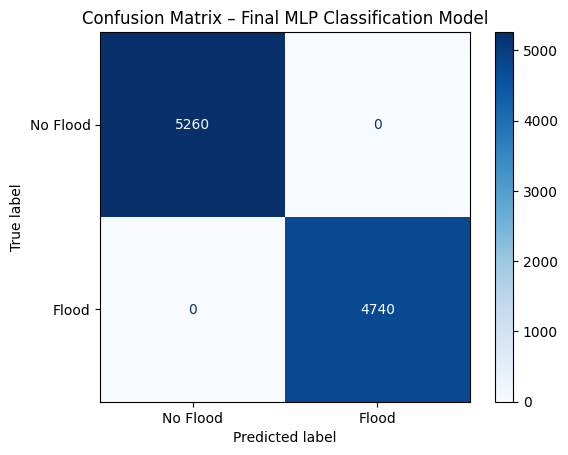

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_mlp)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Flood", "Flood"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Final MLP Classification Model")
plt.show()



### 8.1 Logistic Regression – Baseline Model

Logistic Regression is used as a baseline classification model.


In [55]:

# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train, y_train)

# y_pred_lr = lr.predict(X_test)
# lr_test_metrics = evaluate_model(y_test, y_pred_lr)
# lr_test_metrics


In [56]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
lr_test_metrics = evaluate_model(y_test, y_pred_lr)
lr_test_metrics

y_train_pred_lr = lr.predict(X_train)

print("Logistic Regression – Training Results:")
print(classification_report(y_train, y_train_pred_lr))

print("\nLogistic Regression – Test Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression – Training Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21245
           1       1.00      1.00      1.00     18755

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


Logistic Regression – Test Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5260
           1       1.00      1.00      1.00      4740

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000




### 8.2 Logistic Regression – Hyperparameter Tuning
**Cross Validation**

Cross-validation is used to evaluate model stability.


In [57]:

lr_cv_score = cross_val_score(lr, X_train, y_train, cv=5, scoring="f1").mean()
lr_cv_score


np.float64(1.0)


### 8.3 Logistic Regression – Feature Selection

Recursive Feature Elimination (RFE) is applied to select the most important features.


In [58]:

rfe_lr = RFE(LogisticRegression(max_iter=1000), n_features_to_select=8)
rfe_lr.fit(X_train_df, y_train)

selected_features = X.columns[rfe_lr.support_]
selected_features


Index(['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange',
       'DamsQuality', 'IneffectiveDisasterPreparedness', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore'],
      dtype='object')

In [59]:

# X_train_fs = X_train_df[selected_features]
# X_test_fs = X_test_df[selected_features]

# lr_fs = LogisticRegression(max_iter=1000)
# lr_fs.fit(X_train_fs, y_train)

# y_pred_lr_fs = lr_fs.predict(X_test_fs)
# lr_fs_test_metrics = evaluate_model(y_test, y_pred_lr_fs)
# lr_fs_test_metrics

In [60]:
X_train_fs = X_train_df[selected_features]
X_test_fs = X_test_df[selected_features]

lr_fs = LogisticRegression(max_iter=1000)
lr_fs.fit(X_train_fs, y_train)

y_pred_lr_fs = lr_fs.predict(X_test_fs)
lr_fs_test_metrics = evaluate_model(y_test, y_pred_lr_fs)
lr_fs_test_metrics

y_train_pred_lr_fs = lr_fs.predict(X_train_fs)

print("Logistic Regression with Feature Selection – Training Results:")
print(classification_report(y_train, y_train_pred_lr_fs))

print("\nLogistic Regression with Feature Selection – Test Results:")
print(classification_report(y_test, y_pred_lr_fs))

Logistic Regression with Feature Selection – Training Results:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     21245
           1       0.71      0.69      0.70     18755

    accuracy                           0.72     40000
   macro avg       0.72      0.72      0.72     40000
weighted avg       0.72      0.72      0.72     40000


Logistic Regression with Feature Selection – Test Results:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5260
           1       0.71      0.70      0.70      4740

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000




### 8.4 Decision Tree – Baseline and Tuned Models


**Decision Tree – Baseline**

In [61]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_test_metrics = evaluate_model(y_test, y_pred_dt)
dt_test_metrics


{'Accuracy': 0.6928,
 'Precision': 0.6763959390862944,
 'Recall': 0.6746835443037975,
 'F1-Score': 0.6755386565272496}

**Decision Tree – Tuned**

In [62]:

param_grid = {
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1"
)
grid.fit(X_train, y_train)

best_dt_params = grid.best_params_
best_dt_params


{'max_depth': 20, 'min_samples_split': 2}

**Decision Tree – Feature Selected**

In [63]:

dt_tuned = DecisionTreeClassifier(**best_dt_params, random_state=42)
dt_tuned.fit(X_train, y_train)

y_pred_dt_tuned = dt_tuned.predict(X_test)
dt_tuned_test_metrics = evaluate_model(y_test, y_pred_dt_tuned)
dt_tuned_test_metrics


{'Accuracy': 0.6922,
 'Precision': 0.6772610921501706,
 'Recall': 0.669831223628692,
 'F1-Score': 0.6735256682223165}


## 9. Final Model Comparison

All models are compared using a single summary table.


In [67]:

comparison_table = pd.DataFrame({
    "Model": [
        "Neural Network (MLP)",
        "Logistic Regression (Baseline)",
        "Logistic Regression (Feature Selected)",
        "Decision Tree (Baseline)",
        "Decision Tree (Tuned)"
    ],
    "Selected Features": [
        "All Features",
        "All Features",
        "Selected Features",
        "All Features",
        "Selected Features"
    ],
    "Accuracy": [
        mlp_test_metrics["Accuracy"],
        lr_test_metrics["Accuracy"],
        lr_fs_test_metrics["Accuracy"],
        dt_test_metrics["Accuracy"],
        dt_tuned_test_metrics["Accuracy"]
    ],
    "Precision": [
        mlp_test_metrics["Precision"],
        lr_test_metrics["Precision"],
        lr_fs_test_metrics["Precision"],
        dt_test_metrics["Precision"],
        dt_tuned_test_metrics["Precision"]
    ],
    "Recall": [
        mlp_test_metrics["Recall"],
        lr_test_metrics["Recall"],
        lr_fs_test_metrics["Recall"],
        dt_test_metrics["Recall"],
        dt_tuned_test_metrics["Recall"]
    ],
    "F1-Score": [
        mlp_test_metrics["F1-Score"],
        lr_test_metrics["F1-Score"],
        lr_fs_test_metrics["F1-Score"],
        dt_test_metrics["F1-Score"],
        dt_tuned_test_metrics["F1-Score"]
    ]
})

comparison_table


,Model,Selected Features,Accuracy,Precision,Recall,F1-Score
0,Neural Network (MLP),All Features,1.0000,1.000000,1.000000,1.000000
1,Logistic Regression (Baseline),All Features,1.0000,1.000000,1.000000,1.000000
2,Logistic Regression (Feature Selected),Selected Features,0.7233,0.713297,0.695992,0.704538
3,Decision Tree (Baseline),All Features,0.6928,0.676396,0.674684,0.675539
4,Decision Tree (Tuned),Selected Features,0.6922,0.677261,0.669831,0.673526



## 10. Conclusion

This project demonstrates that environmental and climatic variables can be effectively used to classify flood occurrence. Exploratory data analysis helped in understanding feature distributions and relationships, while preprocessing ensured that the data was suitable for machine learning models. Feature selection and hyperparameter tuning were applied to improve model performance and reduce complexity.

Among the evaluated models, the Neural Network (MLP) achieved the best overall performance, attaining the highest accuracy, precision, recall, and F1-score on the test dataset. This indicates that the neural network was able to capture complex, non-linear relationships between environmental factors and flood occurrence. The Decision Tree model also showed strong and consistent performance, particularly after tuning, and offers the advantage of better interpretability compared to neural networks. Logistic Regression served as a useful baseline model but showed reduced performance after feature selection.

Overall, the results highlight the effectiveness of machine learning techniques, especially neural networks and decision trees for flood risk classification and support their potential use in disaster risk assessment and early warning systems.


In [65]:
# models = ["LR", "LR(FS)", "DT", "DT(Tuned)", "NeuralNetwork"]
# f1_scores = [
#     lr_test_metrics["F1-Score"],
#     lr_fs_test_metrics["F1-Score"],
#     dt_test_metrics["F1-Score"],
#     dt_tuned_test_metrics["F1-Score"],
#     mlp_test_metrics["F1-Score"]
# ]

# plt.bar(models, f1_scores)
# plt.ylabel("F1-Score")
# plt.title("Final Model Comparison (F1-Score)")
# plt.ylim(0.5, 1.1)
# plt.show()
